## IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## IMPORTING DATASETS

In [2]:
data = np.load("train_images.npy")

## RBM ARCHITECTURE

In [3]:
class RBM():
  
  def __init__(self, v_size=784, h_size=256, k=1, lr=0.1):
    super(RBM, self).__init__()
    self.v = np.random.randn(1, v_size)
    self.h = np.random.randn(1, h_size)
    self.W = np.random.randn(h_size, v_size)
    self.v_bias = np.zeros((1, v_size))
    self.h_bias = np.zeros((1, h_size))
    self.k = k
    self.lr = lr

  def sigmoid(self, x):
    return 1.0/(1 + np.exp(-x))

  def sample_h_given_v(self, vis):
    htensor = np.matmul(vis, self.W.T) + self.h_bias
    activation = self.sigmoid(htensor)
    sampled_h = np.random.binomial(size=activation.shape, n = 1, p = activation)

    return activation, sampled_h

  def sample_v_given_h(self, hid):
    vtensor = np.matmul(hid, self.W) + self.v_bias
    activation = self.sigmoid(vtensor)
    sampled_v = np.random.binomial(size=activation.shape, n = 1, p = activation)
    

    return activation, sampled_v

  def energy(self, vis):
    _, hidden = self.sample_h_given_v(vis)
    val = -np.matmul(vis, self.v_bias.T)-np.matmul(hidden, self.h_bias.T)-np.matmul(np.matmul(hidden, self.W), vis.T)
    return val

  def contrastive_divergence(self,input_data):
    sample_v = input_data
    for i in range(self.k):
      pre_h, sample_h = self.sample_h_given_v(sample_v)
      pre_v, sample_v = self.sample_v_given_h(sample_h)

      pre_h_tilde, sample_h_tilde = self.sample_h_given_v(pre_v)

    self.W += self.lr * (np.matmul(pre_h.T, input_data) - np.matmul(pre_h_tilde.T, pre_v))
    self.v_bias += self.lr * (input_data - pre_v)
    self.h_bias += self.lr*(pre_h - pre_h_tilde)
    
    return pre_v

  def train(self, data, epochs=1):
    for epoch in range(epochs):
      print("Epoch: ",epoch+1)
      for i,image in enumerate(data):
        image = image/255
        image = np.reshape(image,(1,784))
        _ = self.contrastive_divergence(image)
        if i%1000 == 0:
          print(i," ",self.energy(image))

  def reconstruct(self, test_img):
    for i in range(self.k):
      pre_h, sample_h = self.sample_h_given_v(test_img)
      pre_v, sample_v = self.sample_v_given_h(sample_h)

    return sample_v

## TESTING

In [4]:
rbm = RBM(k=1)
rbm.train(data[:20000],epochs=1)

Epoch:  1
0   [[-899.16717333]]
1000   [[-123.70196144]]
2000   [[-110.81311394]]
3000   [[-91.63069183]]
4000   [[-145.85523606]]
5000   [[-40.19879415]]
6000   [[-183.28333692]]
7000   [[-110.98742388]]
8000   [[-149.25673425]]
9000   [[-61.1258044]]
10000   [[-114.13594102]]
11000   [[-207.21678572]]
12000   [[-144.35361061]]
13000   [[-117.42656762]]
14000   [[-170.01364484]]
15000   [[-116.95034036]]
16000   [[-151.06001078]]
17000   [[-102.81717304]]
18000   [[-150.74746048]]
19000   [[-130.60655479]]


In [5]:
b = data[1000]
b = b.reshape(1,784)
b.shape

(1, 784)

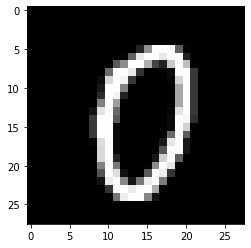

In [6]:
plt.imshow(np.reshape(b,(28,28)),cmap='gray')

C:\Users\vasuk\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


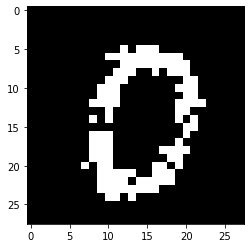

In [7]:
new_b = rbm.reconstruct(b)
plt.imshow(np.reshape(new_b,(28,28)),cmap='gray')

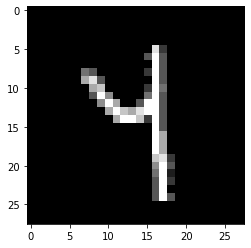

In [8]:
c = data[1004]
c = c.reshape(1,784)
c.shape
plt.imshow(np.reshape(c,(28,28)),cmap='gray')

C:\Users\vasuk\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


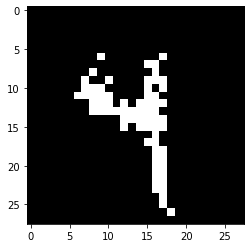

In [9]:
new_c = rbm.reconstruct(c)
plt.imshow(np.reshape(new_c,(28,28)),cmap='gray')

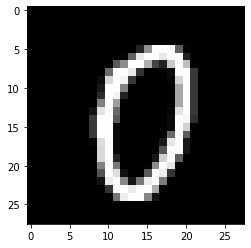

In [10]:
b = data[1000]
b = b.reshape(1,784)
b.shape
plt.imshow(np.reshape(b,(28,28)),cmap='gray')

In [11]:
clip_b = [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36, 146,
        254, 255, 251,  95,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  97,
        234, 254, 254, 232, 254, 254,  35,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
        140, 254, 254, 174,  67,  33, 200, 254, 190,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        108, 253, 254, 235,  51,   1,   0,   0,  12, 254, 253,  56,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  12, 216, 254, 244,  55,   0,   0,   0,   0,   6, 213, 254,
         57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  25, 254, 254, 132,   0,   0,   0,   0,   0,   0,
        168, 254,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  45, 254, 243,  34,   0,   0,   0,   0,
          0,   0, 168, 254,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 128, 254, 157,   0,   0,   0,
          0,   0,   0,   0, 168, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  19, 228, 254, 105,   0,
          0,   0,   0,   0,   0,   7, 0, 0,  57,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 254,
         87,   0,   0,   0,   0,   0,   0,  10, 0, 0,  47,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58,
        0, 0,   9,   0,   0,   0,   0,   0,   0,  10, 0, 210,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  58, 0, 0,   9,   0,   0,   0,   0,   0,   0, 105, 0,
         91,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   5, 0, 0,   9,   0,   0,   0,   0,   0,  24,
        0, 0,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 0, 0,   9,   0,   0,   0,   0,
          0,  84, 0, 0,  23,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 0, 0,  36,   0,   0,
          0,   0,  0, 0, 0,  0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0, 0, 0,
          0,   0,   0,   0, 0, 0, 0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,
        0, 0,  0,   0,   0,  0, 0, 0,  0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  0, 0, 0, 0,  0, 0, 0, 0, 0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  0, 0, 0, 0, 0, 0, 0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 0, 0, 0, 0, 0,  0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]]

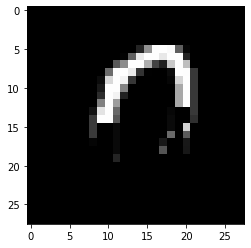

In [12]:
plt.imshow(np.reshape(clip_b,(28,28)),cmap='gray')

C:\Users\vasuk\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


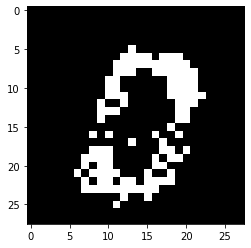

In [13]:
reconstruct_b = rbm.reconstruct(clip_b)
plt.imshow(np.reshape(reconstruct_b,(28,28)),cmap='gray')